In [16]:
import os, shutil
from matplotlib import pyplot
from matplotlib.image import imread
from os import listdir
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
from numpy import asarray
from numpy import save
from keras import layers
from keras import models
from keras import optimizers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

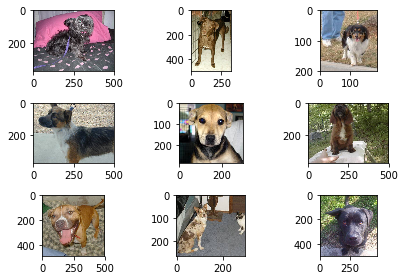

In [7]:
folder = 'dogs-vs-cats/train/train/'
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    filename = folder + 'dog.' + str(i) + '.jpg'
    image = imread(filename)
    pyplot.imshow(image)
pyplot.tight_layout()
pyplot.show()

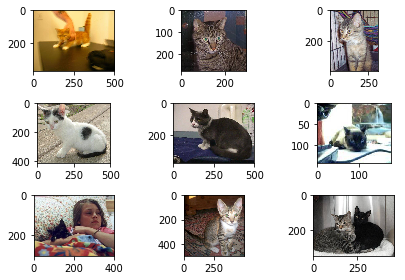

In [8]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    filename = folder + 'cat.' + str(i) + '.jpg'
    image = imread(filename)
    pyplot.imshow(image)
pyplot.tight_layout()
pyplot.show()

In [13]:
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)

In [15]:
seed(1)
val_ratio = 0.25
src_directory = 'dogs-vs-cats/train/train/'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('cat'):
        dst = dataset_home + dst_dir + 'cats/'  + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + dst_dir + 'dogs/'  + file
        copyfile(src, dst)

In [17]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_it = train_datagen.flow_from_directory('dataset_dogs_vs_cats/train/',class_mode='binary', 
                                             batch_size=64, target_size=(200, 200))
test_it = test_datagen.flow_from_directory('dataset_dogs_vs_cats/test/',class_mode='binary', 
                                           batch_size=64, target_size=(200, 200))

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


In [18]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))

    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [23]:
def summarize_diagnostics(history):
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')

    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['acc'], color='blue', label='train')
    pyplot.plot(history.history['val_acc'], color='orange', label='test')
    pyplot.tight_layout()
    pyplot.show()
    pyplot.close()

In [21]:
def run_test_harness():
    model = define_model()

    train_datagen = ImageDataGenerator(rescale=1.0/255.0,width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)

    train_it = train_datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
    class_mode='binary', batch_size=64, target_size=(200, 200))
    test_it = test_datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
    class_mode='binary', batch_size=64, target_size=(200, 200))

    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
    validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
    
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('Accuracy --> %.3f' % (acc * 100.0))
    
    summarize_diagnostics(history)

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
Accuracy > 86.102


KeyError: 'accuracy'

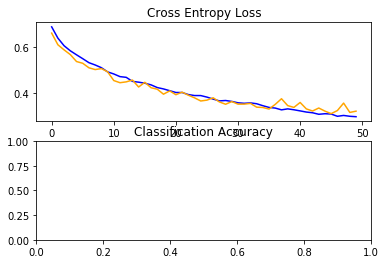

In [22]:
run_test_harness()